In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from macrohet import visualise
from tqdm.auto import tqdm
import os
sns.set(style = 'white')

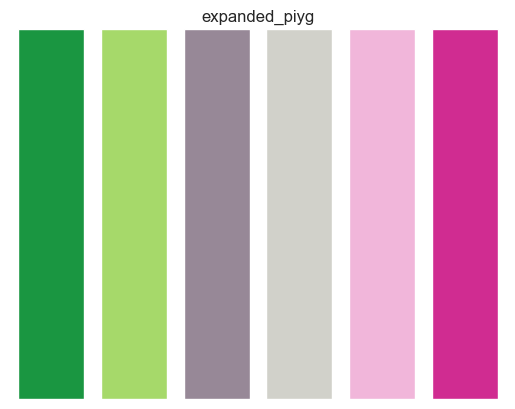

['#1a9641', '#a6d96a', '#978897', '#d1d1ca', '#f1b6da', '#d02c91']


In [58]:
# Get the color palette of the PiYG color map
expanded_piyg = visualise.color_palette('expanded_piyg').colors

sns.set_palette(expanded_piyg)

# Display the colors in the PiYG color map
visualise.show_colors('expanded_piyg')
print(expanded_piyg)

In [100]:
output_dir = '/Users/dayn/data/macrohet_mac/temp_results/'#'/mnt/DATA/macrohet/results/preliminary_sc_measures/cumulative_sc_plots/thresholded_480/'
os.makedirs(output_dir, exist_ok = True)

In [77]:
df = pd.read_pickle('/Users/dayn/data/macrohet_mac/sc_df_GT_70_interp.pkl')
df['dMtb'] = df['delta Mtb max fold-change normalised max area']
df['Mtb'] = df['Intracellular thresholded Mtb content smooth']
# Assuming your DataFrame is named 'df'
df['Strain/Compound'] = df['Compound']  # Create a new column and copy values from 'Compound'
# Replace values in 'NewColumn' where 'Strain' is 'RD1' with 'RD1'
df.loc[df['Strain'] == 'RD1', 'Strain/Compound'] = 'RD1'
df

,Time (hours),x,y,x scaled,y scaled,Infection status,Initial infection status,Final infection status,Area,Intracellular mean Mtb content,...,Strain,Compound,Concentration,Technical replicate,Cell ID,Acquisition ID,Unique ID,dMtb,Mtb,Strain/Compound
0,0,457.172943,8.791715,2304.151633,44.310242,1.0,1.0,0.0,20542.0,343.157196,...,RD1,CTRL,EC0,1,426,"(3, 4)",426.3.4,0.000586,0.912650,RD1
1,1,459.138947,6.718642,2314.060291,33.861954,0.0,1.0,0.0,16683.0,344.687042,...,RD1,CTRL,EC0,1,426,"(3, 4)",426.3.4,0.000586,0.912650,RD1
2,2,460.555237,10.785886,2321.198394,54.360864,0.0,1.0,0.0,18935.0,343.875061,...,RD1,CTRL,EC0,1,426,"(3, 4)",426.3.4,0.000586,0.912650,RD1
3,3,455.878815,11.143067,2297.629226,56.161059,1.0,1.0,0.0,19937.0,345.565796,...,RD1,CTRL,EC0,1,426,"(3, 4)",426.3.4,0.000586,0.912650,RD1
4,4,462.634186,14.050420,2331.676296,70.814116,1.0,1.0,0.0,21793.0,350.585083,...,RD1,CTRL,EC0,1,426,"(3, 4)",426.3.4,0.000586,0.912650,RD1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296992,70,628.562500,1099.782104,3167.955000,5542.901807,1.0,0.0,1.0,101991.0,377.731873,...,WT,BDQ,EC99,2,935,"(6, 9)",935.6.9,0.000030,5.031497,BDQ
296993,71,628.463684,1102.144409,3167.456968,5554.807822,1.0,0.0,1.0,100978.0,377.812103,...,WT,BDQ,EC99,2,935,"(6, 9)",935.6.9,0.000030,5.274554,BDQ
296994,72,628.672058,1101.594727,3168.507173,5552.037422,1.0,0.0,1.0,108397.0,376.812805,...,WT,BDQ,EC99,2,935,"(6, 9)",935.6.9,0.000030,5.220153,BDQ
296995,73,630.372803,1102.817749,3177.078926,5558.201455,1.0,0.0,1.0,107079.0,377.437073,...,WT,BDQ,EC99,2,935,"(6, 9)",935.6.9,0.000030,5.002094,BDQ


In [47]:
# Function to calculate gradient for a window
def calculate_gradient(window):
    y = window
    x = np.arange(len(window))
    slope, _ = np.polyfit(x, y, 1)
    return slope

# Calculate gradient for each window
gradients = sc_df['Mtb'].rolling(window=15).apply(calculate_gradient, raw=True)

# Find maximum gradient
max_gradient = gradients.max()

In [142]:
# df['Max. dMtb gradient'] = np.nan  # Initialize with NaN instead of None
for unique_ID in tqdm(df['Unique ID'].unique()):
    sc_df = df[df['Unique ID'] == unique_ID]
    break
#     max_gradient = sc_df['Mtb'].rolling(window=15).apply(calculate_gradient, raw=True).max()
#     df.loc[df['Unique ID'] == unique_ID, 'Max. dMtb gradient'] = max_gradient
#     if max_gradient > 120:
#         print(unique_ID)

  0%|          | 0/3988 [00:00<?, ?it/s]

In [166]:
unique_ID

'426.3.4'

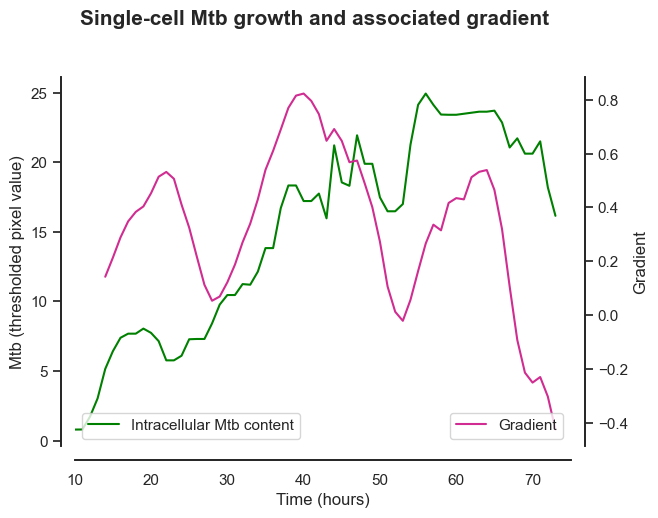

In [143]:
# Create the initial plot with the first data series
ax1 = sns.lineplot(data=sc_df['Mtb'], color='green', label = 'Intracellular Mtb content')
plt.legend(loc= 'lower left')
ax1.set_ylabel('Mtb (thresholded pixel value)')
# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second data series on the second y-axis
sns.lineplot(data=gradients, ax=ax2, color = expanded_piyg[-1], label = 'Gradient')

# Set the y-axis label for the second y-axis
ax2.set_ylabel('Gradient')
plt.legend(loc= 'lower right')
# Adjust plot appearance
sns.despine(offset=10, top=True, right=False)
plt.xlim(10, 75)
# Set the x-axis label and title for the plot
ax1.set_xlabel('Time (hours)')
plt.gcf().suptitle('Single-cell Mtb growth and associated gradient', 
                   fontsize=15, fontweight='bold', 
                  y = 1.02)
plt.savefig(os.path.join(output_dir, 'max_growth_rate_illustration.png'), bbox_inches = 'tight', dpi = 314)

In [113]:
sc_df = df[df['Unique ID'] == '85.4.5']


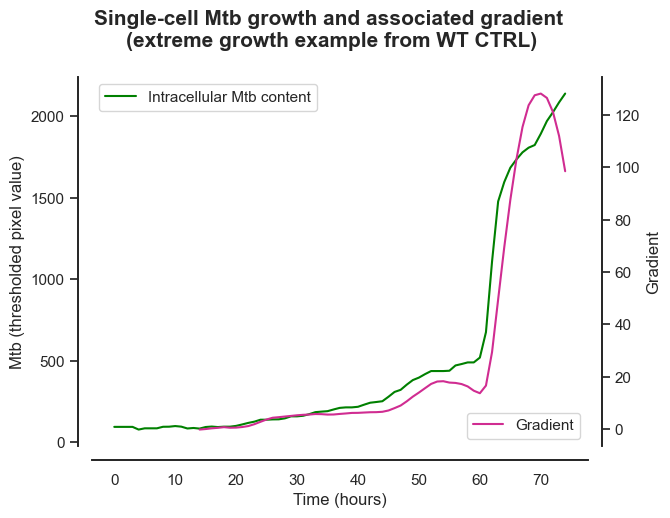

In [140]:
# Create the initial plot with the first data series
ax1 = sns.lineplot(data=sc_df, y = 'Mtb', x = 'Time (hours)', color='green', label='Intracellular Mtb content')
ax1.set_ylabel('Mtb (thresholded pixel value)')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second data series on the second y-axis
sns.lineplot(data =sc_df, y =sc_df['Mtb'].rolling(window=15).apply(calculate_gradient, raw=True), x = 'Time (hours)', ax=ax2, color=expanded_piyg[-1], label='Gradient')
ax2.set_ylabel('Gradient')

# Adjust plot appearance
sns.despine(offset=10, top=True, right=False)

# Set the x-axis label and title for the plot
ax1.set_xlabel('Time (hours)')
# ax1.set_title('Single-cell Mtb growth and associated gradient \n(extreme growth example from WT CTRL)')

# Handle legends
ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.gcf().suptitle('Single-cell Mtb growth and associated gradient \n(extreme growth example from WT CTRL)', 
                   fontsize=15, fontweight='bold', 
                  y = 1.02)

plt.savefig(os.path.join(output_dir, 'max_growth_rate_extreme_illustration.png'), bbox_inches='tight', dpi=314)
plt.show()

### Is this max gradient correlated to antibiotic condition?

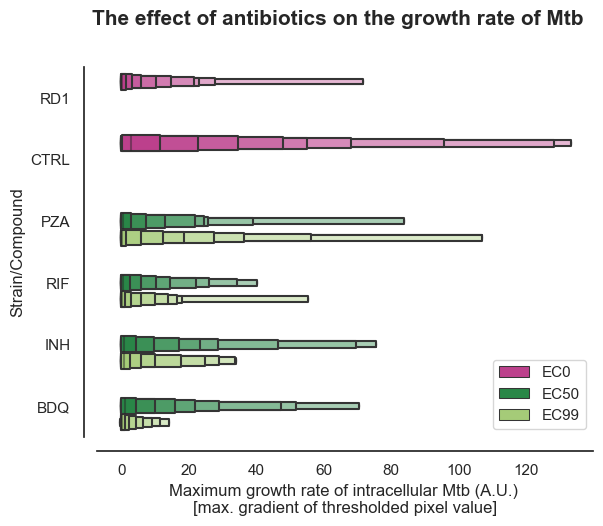

In [163]:
g = sns.boxenplot(x="Max. dMtb gradient", y="Strain/Compound",
            hue="Concentration", 
            palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
            data=df, 
            scale = 'linear'
              )  
sns.despine(offset = 10)
plt.xlabel("Maximum growth rate of intracellular Mtb (A.U.) \n[max. gradient of thresholded pixel value]")
plt.gcf().suptitle('The effect of antibiotics on the growth rate of Mtb', 
                   fontsize=15, fontweight='bold', 
                  y = 1.0)
sns.despine(offset=10)
plt.legend(loc = 'lower right')
plt.savefig(os.path.join(output_dir, 'ATB_effect_max_growth_rate.png'), bbox_inches = 'tight', dpi = 314)

In [92]:
help(sns.boxenplot)

Help on function boxenplot in module seaborn.categorical:

boxenplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, k_depth='tukey', linewidth=None, scale='exponential', outlier_prop=0.007, trust_alpha=0.05, showfliers=True, ax=None, box_kws=None, flier_kws=None, line_kws=None)
    Draw an enhanced box plot for larger datasets.
    
    This style of plot was originally named a "letter value" plot because it
    shows a large number of quantiles that are defined as "letter values".  It
    is similar to a box plot in plotting a nonparametric representation of a
    distribution in which all features correspond to actual observations. By
    plotting more quantiles, it provides more information about the shape of
    the distribution, particularly in the tails. For a more extensive
    explanation, you can read the paper that introduced the plot:
    https://vita.had.co.nz/papers/letter-v

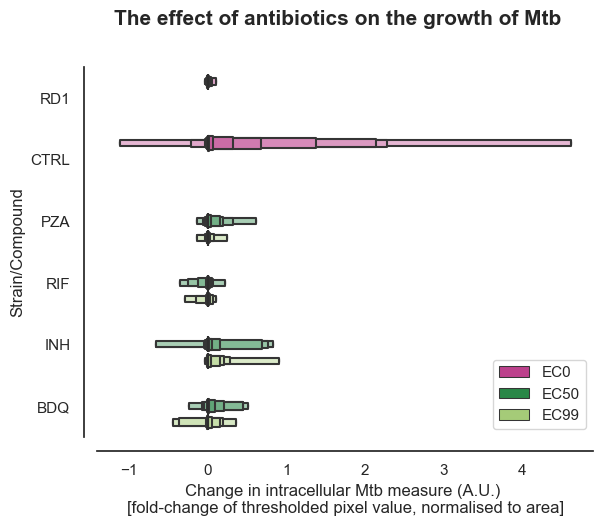

In [164]:
sns.boxenplot(x="dMtb", y="Strain/Compound",
            hue="Concentration", 
            palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
            data=df, 
            scale='linear'
              )  
sns.despine(offset = 10)
# plt.xlim(0,5)
plt.xlabel("Change in intracellular Mtb measure (A.U.) \n[fold-change of thresholded pixel value, normalised to area]")
plt.gcf().suptitle('The effect of antibiotics on the growth of Mtb', 
                   fontsize=15, fontweight='bold', 
                  y = 1.0)
sns.despine(offset=10)
plt.legend(loc = 'lower right')
plt.savefig(os.path.join(output_dir, 'dMtb_boxenplot.png'), bbox_inches = 'tight', dpi = 314)

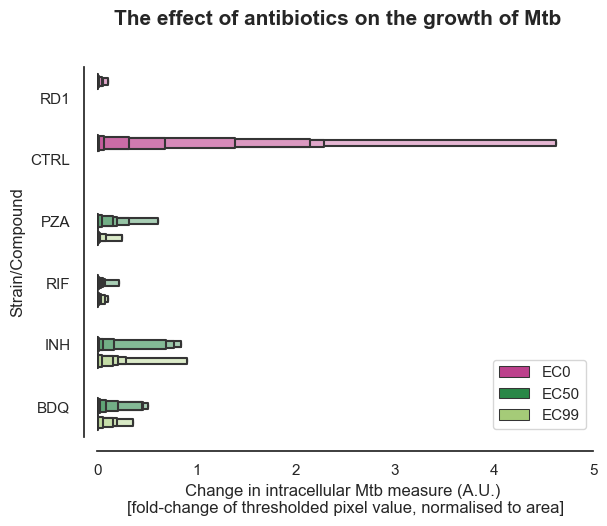

In [165]:
sns.boxenplot(x="dMtb", y="Strain/Compound",
            hue="Concentration", 
            palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
            data=df, 
            scale='linear'
              )  
sns.despine(offset = 10)
plt.xlim(0,5)
plt.xlabel("Change in intracellular Mtb measure (A.U.) \n[fold-change of thresholded pixel value, normalised to area]")
plt.gcf().suptitle('The effect of antibiotics on the growth of Mtb', 
                   fontsize=15, fontweight='bold', 
                  y = 1.0)
sns.despine(offset=10)
plt.legend(loc = 'lower right')
plt.savefig(os.path.join(output_dir, '+dMtb_boxenplot.png'), bbox_inches = 'tight', dpi = 314)

In [ ]:
for acq_ID in df['Acquisition ID'].unique():
    subset_df = [df['Acquisition ID'] == acq_ID]
    mean_max_dMtb_gradient = np.mean 